In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [2]:
with zipfile.ZipFile('/Users/ilayda/Documents/GitHub/spotify-data-science-project/subset_dataset.csv.zip') as zip:
    with zip.open('subset_dataset.csv') as myZip:
        df_subset = pd.read_csv(myZip) 

In [3]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70485 entries, 0 to 70484
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           70485 non-null  int64  
 1   Country              70485 non-null  object 
 2   Uri                  70485 non-null  object 
 3   Popularity           70485 non-null  float64
 4   Title                70485 non-null  object 
 5   Artist               70485 non-null  object 
 6   Album/Single         70485 non-null  object 
 7   sub_genre            70485 non-null  object 
 8   Artist_followers     70485 non-null  float64
 9   Explicit             70485 non-null  bool   
 10  Album                70485 non-null  object 
 11  Release_date         70485 non-null  object 
 12  Track_number         70485 non-null  int64  
 13  Tracks_in_album      70485 non-null  int64  
 14  danceability         70485 non-null  float64
 15  energy               70485 non-null 

In [4]:
print('Dataset: ', df_subset.shape[0], 'Rows with', df_subset.shape[1], 'Features')

Dataset:  70485 Rows with 59 Features


In [5]:
#Finding missing values on the dataset
df_subset.isnull().sum()

Unnamed: 0             0
Country                0
Uri                    0
Popularity             0
Title                  0
Artist                 0
Album/Single           0
sub_genre              0
Artist_followers       0
Explicit               0
Album                  0
Release_date           0
Track_number           0
Tracks_in_album        0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acoustics              0
instrumentalness       0
liveliness             0
valence                0
tempo                  0
time_signature         0
genre                  0
Days_since_release     0
Released_after_2017    0
Explicit_false         0
Explicit_true          0
album                  0
compilation            0
single                 0
anger                  0
anticipation           0
disgust                0
fear                   0
joy                    0
sadness                0


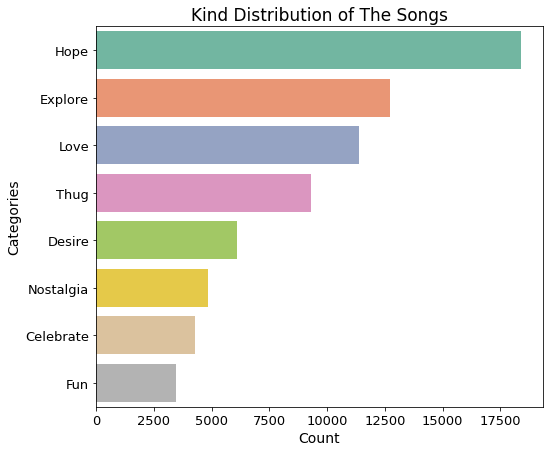

In [6]:
plt.figure(figsize=(8,7))
idx = df_subset['LDA_Topic'].value_counts().index
sns.countplot(y=df_subset['LDA_Topic'], order=idx, palette="Set2")
plt.title('Kind Distribution of The Songs', fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.show()

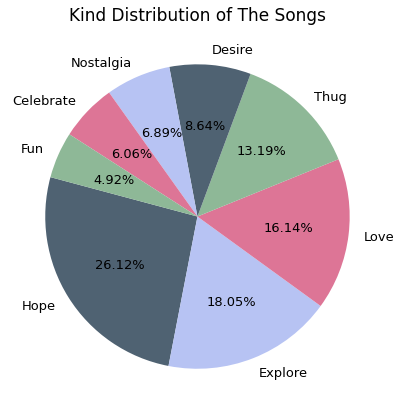

In [7]:
plt.figure(figsize=(7,7))
df_subset['LDA_Topic'].value_counts().plot.pie(autopct='%.2f%%', textprops={'fontsize':13}, startangle=165, colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Kind Distribution of The Songs', fontsize=17)
plt.ylabel('')
plt.show()

In [8]:
feelings = df_subset[['anger', 'anticipation', 'disgust',  'fear', 'joy', 'sadness',  'surprise', 'trust']]

In [9]:
feelings

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...
70480,2.0,0.0,2.0,2.0,0.0,3.0,0.0,0.0
70481,0.0,4.0,0.0,1.0,3.0,1.0,1.0,3.0
70482,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0
70483,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0


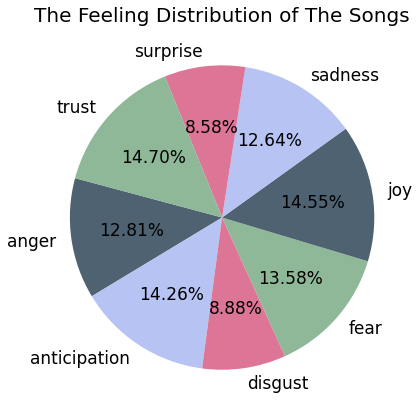

In [10]:
plt.figure(figsize=(7,7))
feelings.sum().plot.pie(autopct='%.2f%%', textprops={'fontsize':17}, startangle=165, colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('The Feeling Distribution of The Songs', fontsize=20)
plt.ylabel('')
plt.show()

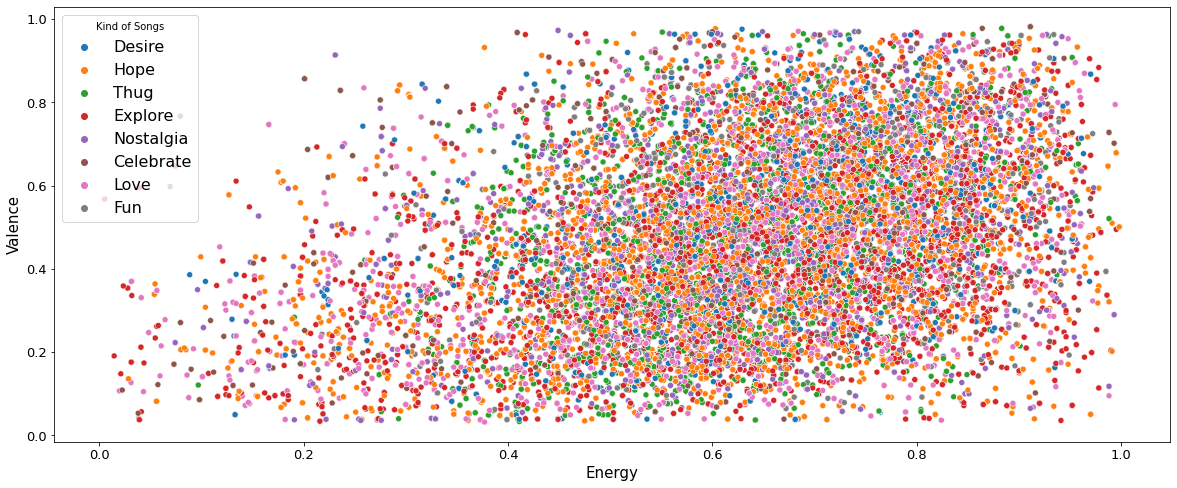

In [11]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df_subset['energy'],y=df_subset['valence'],hue=df_subset['LDA_Topic'])
plt.xlabel('Energy', fontsize=15)
plt.ylabel('Valence', fontsize=15)
plt.legend(prop={'size':16}, title='Kind of Songs')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()